## 100DaysOfBytewise - Machine Learning Fellowship

####  Classifying Loan Status Using Decision Trees
####     Dataset: 
#### Lending Club Loan Data
####     Preprocessing Steps:
#### Handle missing values if any.
#### Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).
#### Standardize numerical features.
####     Task: 
####  Implement a decision tree classifier to classify loan status and evaluate the model using accuracy and ROC-AUC.


In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv('loan.csv')

# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing target values
df = df.dropna(subset=['loan_status'])

# Fill missing values in other columns with the median (for numerical) or mode (for categorical)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)


# Identify numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])



# Define the target variable and features
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


# Predict on the test data
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


C:\Users\Fast Computer\AppData\Local\Temp\ipykernel_8336\1811351326.py:9: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0   

 #### Predicting Hospital Readmission Using Logistic Regression
 ####   Dataset: 
#### Hospital Readmission Dataset
####    Preprocessing Steps:
#### Handle missing values (e.g., fill missing values with mode for categorical variables).
#### Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc.).
#### Standardize numerical features.
####     Task:
#### Implement logistic regression to predict hospital readmission and evaluate the model using precision, recall, and F1-score.


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
url = 'hospital_readmissions.csv'
df = pd.read_csv(url)

# Inspect the first few rows
print(df.head())
print(df.info())

# Fill missing values for categorical features with mode
categorical_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# List of numerical features
numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Target variable
y = df['readmitted'].map({'no': 0, 'yes': 1})  # Convert target to binary values

# Features
X = df.drop('readmitted', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_regression.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med

#### Classifying Digit Images Using Decision Trees
####    Dataset: 
#### MNIST Dataset
####    Preprocessing Steps:
#### Normalize pixel values.
#### Reshape data as needed for model input.
####    Task: 
#### Implement a decision tree classifier to classify handwritten digits and evaluate the model using accuracy and confusion matrix.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


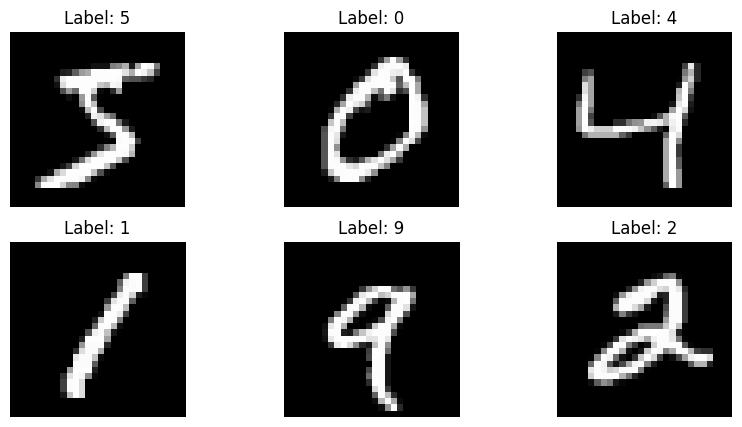

(60000, 784)
(10000, 784)
Accuracy: 0.8786


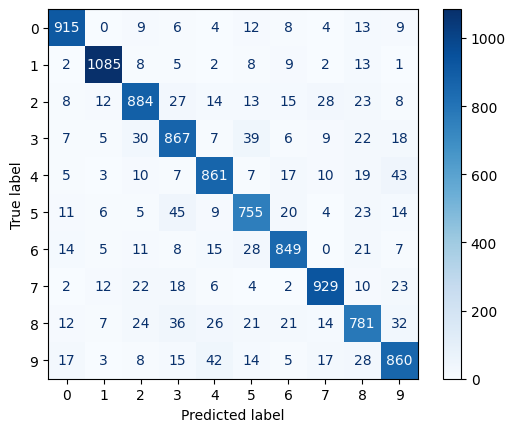

In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Inspect the first few images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to 2D (samples, features) for the decision tree
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

# Instantiate the model
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


#### Predicting Loan Approval Using Logistic Regression

#### Dataset: 
#### Loan Prediction Dataset
#### Preprocessing Steps:
#### Handle missing values (e.g., fill missing values with mode for categorical variables).
#### Encode categorical variables (e.g., one-hot encoding for gender, married status, etc.).
#### Standardize numerical features.
#### Task: 
#### Implement logistic regression to predict loan approval and evaluate the model using accuracy and confusion matrix.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
url = 'loan_approval_dataset.csv' 
df = pd.read_csv(url)

# Remove any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Handle missing values by filling with mode for categorical variables
categorical_features = ['education', 'self_employed']
for col in categorical_features:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        print(f"Column {col} not found in the dataset")

# Fill missing values for numerical features with mean
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Handle missing values in target variable
df = df.dropna(subset=['loan_status'])

# Verify that 'loan_status' does not contain NaNs
print(df['loan_status'].isna().sum())

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Target variable
y = df['loan_status'].map({'Rejected': 0, 'Approved': 1})

# Check for NaNs in the target variable after mapping
print(y.isna().sum())

# Features
X = df.drop(['loan_id', 'loan_status'], axis=1, errors='ignore')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
logistic_regression = LogisticRegression(max_iter=1000)

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


#### Classifying Wine Quality Using Decision Trees

#### Dataset: 
#### Wine Quality Dataset
#### Preprocessing Steps:
#### Handle missing values if any.
#### Standardize features.
#### Encode categorical variables if present.
#### Task:
#### Implement a decision tree classifier to classify wine quality (good/bad) and evaluate the model using accuracy and ROC-AUC.


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

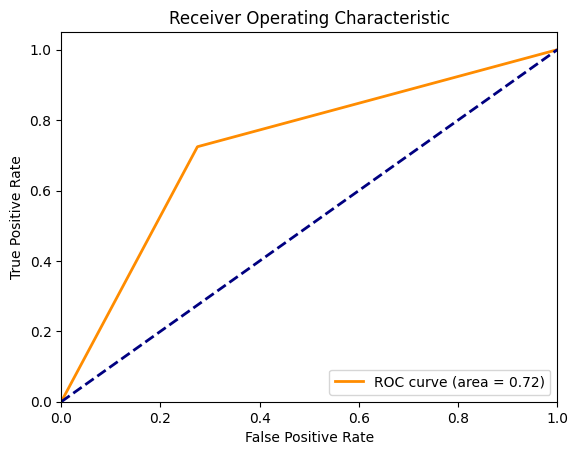

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
url = 'WineQT.csv'  
df = pd.read_csv(url)

# Inspect the dataset
print(df.head())
print(df.info())

# Handle missing values
df = df.dropna()  # Drop rows with missing values, or use other imputation techniques if necessary

# Assume the target variable is 'quality' and we classify wine as 'good' (quality > 5) or 'bad' (quality <= 5)
df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Split features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
